<a href="https://colab.research.google.com/github/Sriram-764/Data-Warehousing-and-Data-Mining/blob/main/DWDM_Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# impoting the required modules

import pandas as pd
import numpy as np

In [52]:
# Loding the dataset

data = pd.read_csv('collegePlace.csv')

In [53]:
# Finding the features of the dataset

data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


***Exploratory Data Analysis***

From the above data we can say that "PlacedOrNot" is the target column This dataset can be considered as the categorical dataset since the class "PlacedOrNot" respresents two classes 0 or 1 representing placed or not

In [54]:
# Finding the missing values

missing_values = data.isnull().sum()
missing_values

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

There are no missing values in the dataset

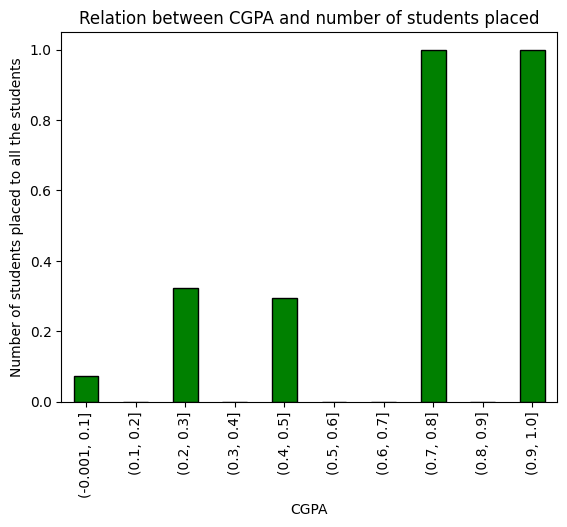

In [61]:
# Finding the relationship between CGPA and PlacedOrNot features
import matplotlib.pyplot as plt

# Getting all the placed students
placed_students = data[data['PlacedOrNot'] == 1]

# Getting all the students grouped by thier CGPA
students_group_by_cgpa = data.groupby(pd.cut(data['CGPA'], bins = 10)).size()

# Getting all the placed students grouped by their CGPA
students_placed_in_cgpa_ranges = placed_students.groupby(pd.cut(data['CGPA'], bins = 10)).size()

# Getting the ratio to the placed and total students in a CGPA range
ratio_to_palced_and_not_placed = students_placed_in_cgpa_ranges / students_group_by_cgpa

# Plotting the bar graph from the above information
ratio_to_palced_and_not_placed.plot(kind='bar', color='green', edgecolor='black')
plt.title('Relation between CGPA and number of students placed')
plt.xlabel('CGPA')
plt.ylabel('Number of students placed to all the students')
plt.show()

From the above graph we can observe that the ratio to placed to all the students is more when the CGPA is high. So we can say that the more the CGPA the more then the student have more chance to get the placement

**Dealing with the categorical data**

Let's try to categoring the data according to the CGPA's of students

In [56]:
data['CGPA Category'] = pd.cut(data['CGPA'], bins = [4, 5, 6, 7, 8, 9, 10], labels = ['4-5','5-6','6-7','7-8','8-9','9-10'])
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,CGPA Category
0,22,Male,Electronics And Communication,1,8,1,1,1,7-8
1,21,Female,Computer Science,0,7,1,1,1,6-7
2,22,Female,Information Technology,1,6,0,0,1,5-6
3,21,Male,Information Technology,0,8,0,1,1,7-8
4,22,Male,Mechanical,0,8,1,0,1,7-8


**Sacling the features**

In [57]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['Gender'] = encoder.fit_transform(data['Gender'])

data['Stream'] = encoder.fit_transform(data['Stream'])

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Let's scale the independent variables

numerical_features = ['Age', 'Internships', 'CGPA', 'HistoryOfBacklogs']

data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [59]:
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,CGPA Category
0,0.272727,1,3,0.333333,0.75,1,1.0,1,7-8
1,0.181818,0,1,0.000000,0.50,1,1.0,1,6-7
2,0.272727,0,4,0.333333,0.25,0,0.0,1,5-6
3,0.181818,1,4,0.000000,0.75,0,1.0,1,7-8
4,0.272727,1,5,0.000000,0.75,1,0.0,1,7-8


**Splitting the data into train and test data**

In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[numerical_features], data['PlacedOrNot'], random_state = 42)

In [64]:
x_train

,Age,Internships,CGPA,HistoryOfBacklogs
2906,0.181818,0.000000,0.75,0.0
949,0.272727,0.000000,0.50,0.0
1659,0.181818,0.000000,0.25,1.0
2965,0.363636,0.000000,0.75,0.0
2103,0.000000,0.000000,0.50,0.0
...,...,...,...,...
1638,0.272727,1.000000,0.75,0.0
1095,0.272727,0.333333,0.25,0.0
1130,0.272727,0.333333,0.75,0.0
1294,0.272727,0.000000,0.50,0.0
